
## PCA for Feature Extraction, Visualization and Classification

In [1]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

# prepare my own photo
# pathlist = glob.glob(r"PIE/myself/*.jpg")
# for i,path in enumerate(pathlist):
#
#     img = cv2.imread(path,0)
#     img = cv2.resize(img,[32,32])
#     print(img.shape)
#     savepath = "PIE/0/"+str(i+1)+".jpg"
#     print(savepath)
#     cv2.imwrite(savepath, img)

# load data

indexlist = np.arange(1,69,1)
np.random.shuffle(indexlist)
indexlist = indexlist[0:25]
#indexlist = np.append(indexlist,0)
indexlist.sort()
print(indexlist)
eachclass_num = [len([f for f in os.listdir(os.path.join('PIE', str(s))) if f.endswith('.jpg')]) for s in indexlist]
total_num = sum(eachclass_num)
vector = np.zeros([total_num,32,32])
label = np.zeros([total_num,1])


n=0
for i,cls in enumerate(indexlist):
    for img_path in [f for f in os.listdir(os.path.join('PIE', str(cls))) if f.endswith('.jpg')]:
        img_path = "PIE/"+str(cls)+"/"+img_path
        img_cur = cv2.imread(img_path,0)
        vector[n] = img_cur
        label[n] = cls
        n += 1

vector = np.reshape(vector,(vector.shape[0],-1))
vector = np.concatenate([vector,label],axis=1)
np.random.shuffle(vector)
label[:,:] = vector[:,1024:1025]
vector = vector[:,0:1024]



self_vector = np.zeros([10,32,32])
self_label = np.zeros([10,1])
n=0
for img_path in [f for f in os.listdir(os.path.join('PIE', str(0))) if f.endswith('.jpg')]:
    img_path = "PIE/" + str(0) + "/" + img_path
    img_cur = cv2.imread(img_path, 0)
    self_vector[n] = img_cur
    n += 1
self_vector = np.reshape(self_vector,(self_vector.shape[0],-1))

[ 1  9 10 13 17 19 23 26 30 31 32 33 34 35 36 43 45 46 48 55 57 58 59 61
 65]


(500, 1024)
(500, 1)
(1278, 1024)
(1278, 1)
---------------------------------------------PCA start!--------------------------------------------------


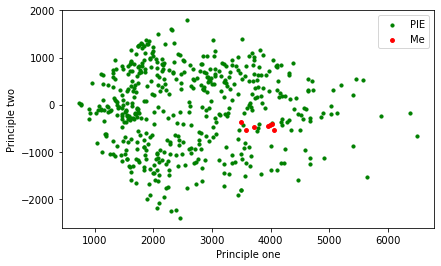

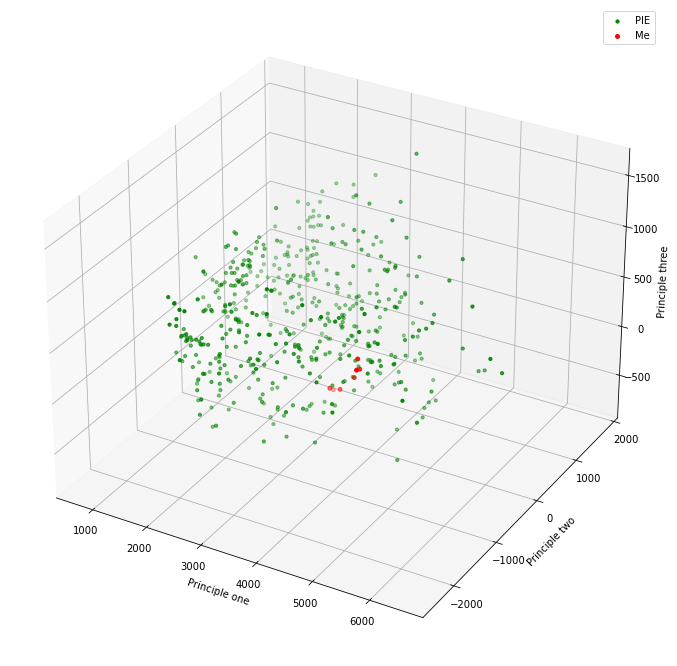

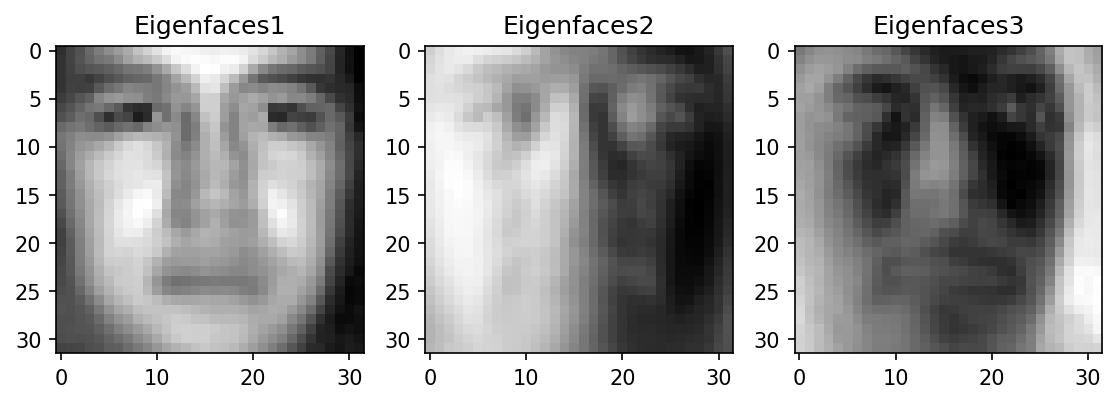

In [2]:
trainset = vector[0:int(total_num*0.7)]
trainlabel = label[0:int(total_num*0.7)]
testset = vector[int(total_num*0.7):]
testlabel = label[int(total_num*0.7):]

images_ids = np.sort(random.sample(range(trainset.shape[0]), 493))
trainset = trainset[images_ids,:]
trainlabel = trainlabel[images_ids,:]
# print(trainset.shape)
# print(trainlabel.shape)
# print(testset.shape)
# print(testlabel.shape)
trainset = np.concatenate([trainset,self_vector[0:7]])
trainlabel = np.concatenate([trainlabel,self_label[0:7]])
testset = np.concatenate([testset,self_vector[7:]])
testlabel = np.concatenate([testlabel,self_label[7:]])

print(trainset.shape)
print(trainlabel.shape)
print(testset.shape)
print(testlabel.shape)
#PCA


print("---------------------------------------------PCA start!--------------------------------------------------")


e_num = 3
def PCA(trainset,k):
    M = trainset - trainset.mean(axis=0)
    train_cov = np.cov(M.T)
    eigenvalues, eigenvectors = np.linalg.eig(train_cov)
    eigenvectors = eigenvectors.real
    sort = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sort]
    eigenvectors = eigenvectors[:, sort]
    eigenvalues = eigenvalues[0:k]
    eigenfaces = eigenvectors[:,0:k]
    return eigenvalues, eigenfaces
def twoDplot(train_redu):
    fig = plt.figure(figsize=plt.figaspect(0.6))
    # 2D Plot
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(train_redu[0:493, 0], train_redu[0:493, 1], s = 10, c = 'g', label='PIE')
    ax.scatter(train_redu[493:500, 0], train_redu[493:500, 1], s = 15, c = 'r', label='Me')
    ax.set_xlabel('Principle one')
    ax.set_ylabel('Principle two')
    ax.legend()
    plt.show()
def threeDplot(train_redu):
    #fig = plt.figure(figsize=plt.figaspect(0.6))
    #3D Plot
    fig = plt.figure(1, figsize=(18, 12))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(train_redu[0:493, 0], train_redu[0:493, 1], train_redu[0:493, 2], s = 10, c = 'g', label='PIE')
    ax.scatter(train_redu[493:500, 0], train_redu[493:500, 1], train_redu[493:500, 2], s = 15, c = 'r', label='Me')
    ax.set_xlabel('Principle one')
    ax.set_ylabel('Principle two')
    ax.set_zlabel('Principle three')
    ax.legend()
    plt.show()
def eigenfacesplot(eigenfaces):
    plt.figure(num=1, dpi=150, figsize=(9, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(np.reshape(eigenfaces[:, 0].T.real, (32, 32)), cmap="gray")
    plt.title("Eigenfaces1")
    plt.subplot(1, 3, 2)
    plt.imshow(np.reshape(eigenfaces[:, 1].real, (32, 32)), cmap="gray")
    plt.title("Eigenfaces2")
    plt.subplot(1, 3, 3)
    plt.imshow(np.reshape(eigenfaces[:, 2].real, (32, 32)), cmap="gray")
    plt.title("Eigenfaces3")
    plt.show()


eigenvalues, eigenfaces = PCA(trainset,e_num)
train_redu = np.dot(trainset, eigenfaces)


# 2D Visualize
twoDplot(train_redu)

# 3D Visualize
threeDplot(train_redu)

# Visualize eigenfaces
eigenfacesplot(eigenfaces)

In [17]:
#------------------------------------------------------KNN------------------------------------------------------------
def KNN(test_data, train_data, train_labels, k):
    train_data_size = train_data.shape[0]
    distance = (np.tile(test_data, (train_data_size, 1)) - train_data) ** 2
    total_distance = distance.sum(axis=1)
    Euler_distance = total_distance ** 0.5
    index = Euler_distance.argsort()
    classlist = []
    for i in range(k):
        vote_label = train_labels[index[i]]
        classlist.append(vote_label)
    classlist = np.array(classlist,dtype=np.int64)
    classlist = classlist.T[0]
    count = np.bincount(classlist)
    predict_class = np.argmax(count)
    return predict_class

trainset = vector[0:int(total_num*0.7)]
trainlabel = label[0:int(total_num*0.7)]
testset = vector[int(total_num*0.7):]
testlabel = label[int(total_num*0.7):]

trainset = np.concatenate([trainset,self_vector[0:7]])
trainlabel = np.concatenate([trainlabel,self_label[0:7]])
myset = self_vector[7:]
mylabel = self_label[7:]
# *********************************************************************40 dimensionalities
print("40 dimensionalities")
e_num = 40
eigenvalues, eigenfaces = PCA(trainset,e_num)
train_redu = np.dot(trainset, eigenfaces)
test_redu = np.dot(testset, eigenfaces)
my_redu = np.dot(myset,eigenfaces)

correct = 0
for i in range(len(test_redu)):
    predict_label = KNN(test_redu[i],train_redu,trainlabel,k=3)
    if predict_label == testlabel[i]:
        correct += 1
print("Accuracy of PIE (40 dimensionalities):",correct/len(test_redu))

correct=0
for i in range(len(my_redu)):
    predict_label = KNN(my_redu[i],train_redu,trainlabel,k=5)
    if predict_label == mylabel[i]:
        correct += 1
print("Accuracy of My own photos (40 dimensionalities):",correct/len(mylabel))

# ******************************************************************80 dimensionalities
print("80 dimensionalities")
e_num = 80
eigenvalues, eigenfaces = PCA(trainset,e_num)
train_redu = np.dot(trainset, eigenfaces)
test_redu = np.dot(testset, eigenfaces)
my_redu = np.dot(myset,eigenfaces)

correct = 0
for i in range(len(test_redu)):
    predict_label = KNN(test_redu[i],train_redu,trainlabel,k=3)
    if predict_label == testlabel[i]:
        correct += 1
print("Accuracy of PIE (80 dimensionalities):",correct/len(test_redu))

correct=0
for i in range(len(my_redu)):
    predict_label = KNN(my_redu[i],train_redu,trainlabel,k=5)
    if predict_label == mylabel[i]:
        correct += 1
print("Accuracy of My own photos (80 dimensionalities):",correct/len(mylabel))
# *******************************************************************200 dimensionalities
print("200 dimensionalities")
e_num = 200
eigenvalues, eigenfaces = PCA(trainset,e_num)
train_redu = np.dot(trainset, eigenfaces)
test_redu = np.dot(testset, eigenfaces)
my_redu = np.dot(myset,eigenfaces)

correct = 0
for i in range(len(test_redu)):
    predict_label = KNN(test_redu[i],train_redu,trainlabel,k=3)
    if predict_label == testlabel[i]:
        correct += 1
print("Accuracy of PIE (200 dimensionalities):",correct/len(test_redu))

correct=0
for i in range(len(my_redu)):
    predict_label = KNN(my_redu[i],train_redu,trainlabel,k=5)
    if predict_label == mylabel[i]:
        correct += 1
print("Accuracy of My own photos (200 dimensionalities):",correct/len(mylabel))

print("FINISH!")


40 dimensionalities
Accuracy of PIE (40 dimensionalities): 0.847843137254902
Accuracy of My own photos (40 dimensionalities): 1.0
80 dimensionalities
Accuracy of PIE (80 dimensionalities): 0.8831372549019608
Accuracy of My own photos (80 dimensionalities): 1.0
200 dimensionalities
Accuracy of PIE (200 dimensionalities): 0.9003921568627451
Accuracy of My own photos (200 dimensionalities): 1.0
FINISH!
